In [48]:
#%tensorflow_version 2.x
import json
import requests as requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from pathlib import Path
%matplotlib inline

In [49]:
# endpoint = 'https://min-api.cryptocompare.com/data/histoday'
# res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=500')
# hist = pd.DataFrame(json.loads(res.content)['Data'])
# hist = hist.set_index('time')
# hist.index = pd.to_datetime(hist.index, unit='s')
# target_col = 'close'

In [50]:
# hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [51]:
# hist.head(5)

In [52]:
import pandas as pd 
hist = pd.read_csv(
    'test.csv',
    index_col='Date',
    parse_dates=True, 
)

hist.head()

,Open,Close,High,Low,Volume,entry,1h%,vol_pct_chg,sma7h,sma9h,sma20h,sma200d,bb_bbm,bb_bbh,bb_bbl
Date,,,,,,,,,,,,,,,
2017-01-02 03:00:00,1011.5,1013.0,1015.0,1009.0,737.045368,0,0.001483,0.707852,1005.025714,1004.300000,991.2765,991.276500,991.2765,1020.548664,962.004336
2017-01-02 04:00:00,1014.0,1015.0,1018.0,1010.5,423.309560,0,0.001974,-0.425667,1006.511429,1006.020000,993.7535,992.406190,993.7535,1022.241744,965.265256
2017-01-02 05:00:00,1014.1,1011.4,1016.8,1008.9,235.217866,0,-0.003547,-0.444336,1007.468571,1006.842222,996.0245,993.269545,996.0245,1022.462288,969.586712
2017-01-02 06:00:00,1012.0,1016.7,1016.9,1010.4,238.331585,0,0.005240,0.013238,1009.998571,1008.186667,998.0090,994.288261,998.0090,1024.398177,971.619823
2017-01-02 07:00:00,1016.6,1018.2,1018.9,1014.1,401.187665,0,0.001475,0.683317,1012.600000,1009.686667,1000.0110,995.284583,1000.0110,1026.147094,973.874906


In [53]:
# hist = hist[-200:]
# hist.tail()

In [68]:
hist.dropna()
hist.head()

,Open,Close,High,Low,Volume,entry,1h%,vol_pct_chg,sma7h,sma9h,sma20h,sma200d,bb_bbm,bb_bbh,bb_bbl
Date,,,,,,,,,,,,,,,
2017-01-02 03:00:00,1011.5,1013.0,1015.0,1009.0,737.045368,0,0.001483,0.707852,1005.025714,1004.300000,991.2765,991.276500,991.2765,1020.548664,962.004336
2017-01-02 04:00:00,1014.0,1015.0,1018.0,1010.5,423.309560,0,0.001974,-0.425667,1006.511429,1006.020000,993.7535,992.406190,993.7535,1022.241744,965.265256
2017-01-02 05:00:00,1014.1,1011.4,1016.8,1008.9,235.217866,0,-0.003547,-0.444336,1007.468571,1006.842222,996.0245,993.269545,996.0245,1022.462288,969.586712
2017-01-02 06:00:00,1012.0,1016.7,1016.9,1010.4,238.331585,0,0.005240,0.013238,1009.998571,1008.186667,998.0090,994.288261,998.0090,1024.398177,971.619823
2017-01-02 07:00:00,1016.6,1018.2,1018.9,1014.1,401.187665,0,0.001475,0.683317,1012.600000,1009.686667,1000.0110,995.284583,1000.0110,1026.147094,973.874906


In [74]:
print(hist.columns)


Index(['Open', 'Close', 'High', 'Low', 'Volume', 'entry', '1h%', 'vol_pct_chg',
       'sma7h', 'sma9h', 'sma20h', 'sma200d', 'bb_bbm', 'bb_bbh', 'bb_bbl'],
      dtype='object')


In [90]:
#Had to modify the output because the indicators were creating a NAN output

hist = hist[['vol_pct_chg', 'sma7h', 'sma9h', 'Close','entry']]
target_col = 'entry'

hist

,Open,High,Low,Volume,Close
Date,,,,,
2017-01-02 03:00:00,1011.500000,1015.0,1009.0,737.045368,1013.000000
2017-01-02 04:00:00,1014.000000,1018.0,1010.5,423.309560,1015.000000
2017-01-02 05:00:00,1014.100000,1016.8,1008.9,235.217866,1011.400000
2017-01-02 06:00:00,1012.000000,1016.9,1010.4,238.331585,1016.700000
2017-01-02 07:00:00,1016.600000,1018.9,1014.1,401.187665,1018.200000
...,...,...,...,...,...
2021-11-17 13:00:00,60514.231682,60639.0,60207.0,476.771475,60207.000000
2021-11-17 14:00:00,60207.000000,60388.0,59724.0,824.163709,59724.666301
2021-11-17 15:00:00,59724.000000,59859.0,59483.0,500.389504,59708.630836


In [91]:
# target_col = 'Close'

In [92]:
target_col

'Close'

In [93]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [94]:
train, test = train_test_split(hist, test_size=0.2)

In [95]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

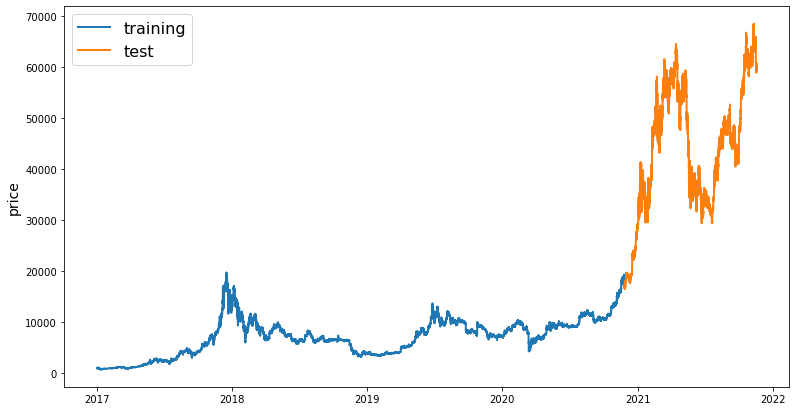

In [96]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

In [97]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [98]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [99]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [100]:
from keras.models import Sequential
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [101]:
import numpy as np
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [102]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [103]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
1068/1068 [==============================] - 5s 3ms/step - loss: 8.9967e-04 - val_loss: 2.5365e-04
Epoch 2/20
1068/1068 [==============================] - 3s 3ms/step - loss: 1.8836e-04 - val_loss: 1.0862e-04
Epoch 3/20
1068/1068 [==============================] - 3s 3ms/step - loss: 1.2352e-04 - val_loss: 1.6086e-04
Epoch 4/20
1068/1068 [==============================] - 3s 3ms/step - loss: 1.1109e-04 - val_loss: 1.0798e-04
Epoch 5/20
1068/1068 [==============================] - 3s 3ms/step - loss: 1.0494e-04 - val_loss: 9.4567e-05
Epoch 6/20
1068/1068 [==============================] - 3s 3ms/step - loss: 1.0405e-04 - val_loss: 9.8501e-05
Epoch 7/20
1068/1068 [==============================] - 3s 3ms/step - loss: 1.0111e-04 - val_loss: 9.7734e-05
Epoch 8/20
1068/1068 [==============================] - 3s 3ms/step - loss: 1.0070e-04 - val_loss: 1.0236e-04
Epoch 9/20
1068/1068 [==============================] - 3s 3ms/step - loss: 1.0093e-04 - val_loss: 1.0866e-04
Epoch 10/2

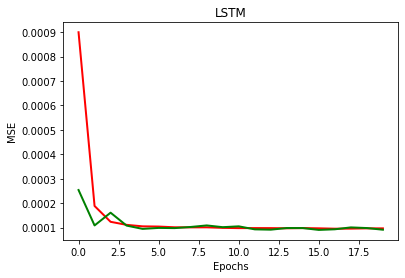

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [105]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.006478505779796967

In [106]:
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(preds, y_test)
MAE


9.112727769707783e-05

In [107]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2

0.778470425566637

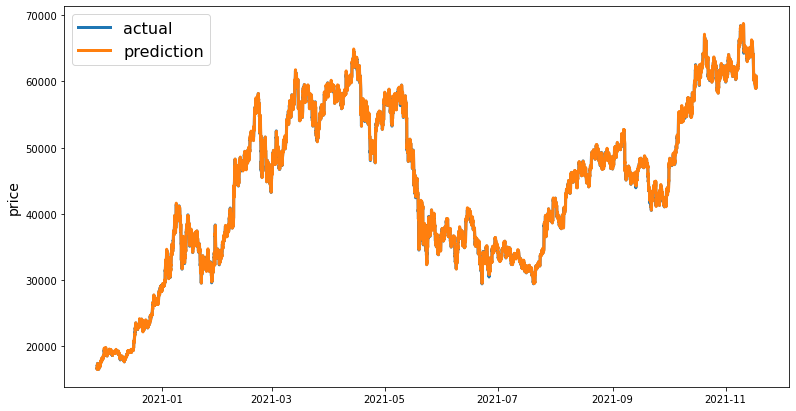

In [108]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)